In [1]:
from math import inf, sinh, cosh
from numpy import arange, vectorize
from matplotlib import pyplot as plt


def find_a(L, h, a_0, table=False):
    """Use Newton's method to numerically approximate the value of a."""
    a = a_0
    diff = inf
    count = 0

    # Repite hasta que el error sea de 0.1.
    while diff > 0.1 and count < 100:
        arg = L / (2 * a)
        expr = a + h - a * cosh(arg)
        deriv = 1 - cosh(arg) + arg * sinh(arg)
        a_plus = a - expr / deriv
        diff = abs(a_plus - a)

        if table:
            print('a: {:7.3f}  a++: {:7.3f}  diff: {:7.3f}'.format(
                    a, a_plus, diff))

        a = a_plus
        count += 1

    # Si la operacion nunca alcanzo la convergencia, devuelve negativo.
    return a if count < 100 else -1


# L      Longitud entre los postes.
# A      Altura de los postes.
# h      Pandeo del cable.
# table  'True' para imprimir la aproximacion numerica de a.
def plot_cat(L, A, h, table=False):
    """Plot the catenary function f(x) = a * cosh(x / a) + c"""

    # Definicion de la ecuacion caracteristica de la catenaria.
    cat = lambda x, a, c: a * cosh(x / a) + c
    vcat = vectorize(cat)

    t = arange(-L / 2, L / 2, 0.2)
    a = find_a(L, h, L / 2, table)  # Encuentra a.

    if a < 0:
        print('error: could not approximate the value of a')
        raise SystemExit(1)

    offset = A - h - cat(0, a, 0)  # Ajuste para que las medidas coincidan.

    # Ejes y rango de la grafica.
    plt.xlabel('Distance (m)')
    plt.ylabel('Height (m)')
    plt.ylim(0, int(1.1 * A))  # Altura + 10%.

    # Imprime grafica.
    plt.plot(t, vcat(t, a, offset), 'r')
    plt.grid()
    plt.show()


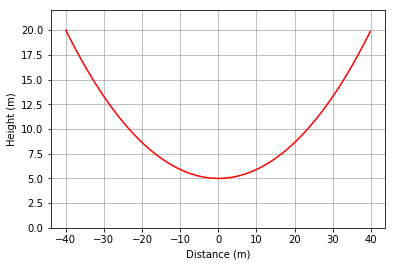

In [2]:
plot_cat(80,20,15)